### This notebook is loading a few different Antarctic Polar Vortex indexes and creating time series to be analysed with the moorings later on. 

#### I use 2 different indexes that are in a table on the Datasets folder. 
#### - Stratospheric-Tropospheric Couple Mode (Lim et al. 2018); refer to https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018JD029321
#### - JRA55-derived index;	calculated from JRA-55 reanalysis using mean zonal winds at 60S and 10hPa using climatology of 1981-2018.
#### - Breakdown Index: 
##### From Black & McDaniel 2006 "The stratospheric polar vortex is characterized by an annual cycle that terminates with a relatively rapid breakdown known as the stratospheric final warming (SFW), which typically occurs during spring. However, considerable interannual variability in the timing of SFW events is observed (e.g., Waugh and Rong 2002) since they are initiated by transient Rossby wave packets propagating upward from tropospheric altitudes. This raises the intriguing scientific question of whether SFW events provide an organizing influence on the stratosphere–troposphere circulation akin to the annular mode behavior described above. For example, are early polar vortex breakdowns accompanied by parallel anomalous weakenings in the tropospheric westerlies near 55°N? The existence of such behavior will have a particular bearing upon the understanding, simulation, and prediction of extratropical seasonal transitions as well as interannual circulation variability.

#### First we import the packages we will need. 

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Read the excell file that contains the indexes on the folder Datasets on this repo. 

In [64]:
file_path = '/home/jovyan/ohw23_proj_SAupwelling/Datasets/Vortex_datasets.csv'
data = pd.read_csv(file_path)

file_path2 = '/home/jovyan/ohw23_proj_SAupwelling/Datasets/anom.BDdates.1979-2016.csv'
data2 = pd.read_csv(file_path2)

#### Explore the data: Once you've read the Excel file, the data will be stored in a DataFrame. You can now use various pandas functions to explore and manipulate the data. For example, you can display the first few rows of the DataFrame using the head() function:

In [67]:
data

,Year,S-Tmode_Lim_et_al_2018,Sep-Nov[U]_60S10hPa_JRA55
0,1979.0,0.888418,-5.539120
1,1980.0,-0.351454,4.054700
2,1981.0,-0.797533,4.123391
3,1982.0,0.541682,-3.587320
4,1983.0,-0.480963,3.180420
5,1984.0,0.345898,-1.324860
6,1985.0,-0.621190,5.414526
7,1986.0,0.267614,-3.653500
8,1987.0,-1.837249,18.071730
9,1988.0,1.516174,-16.644300


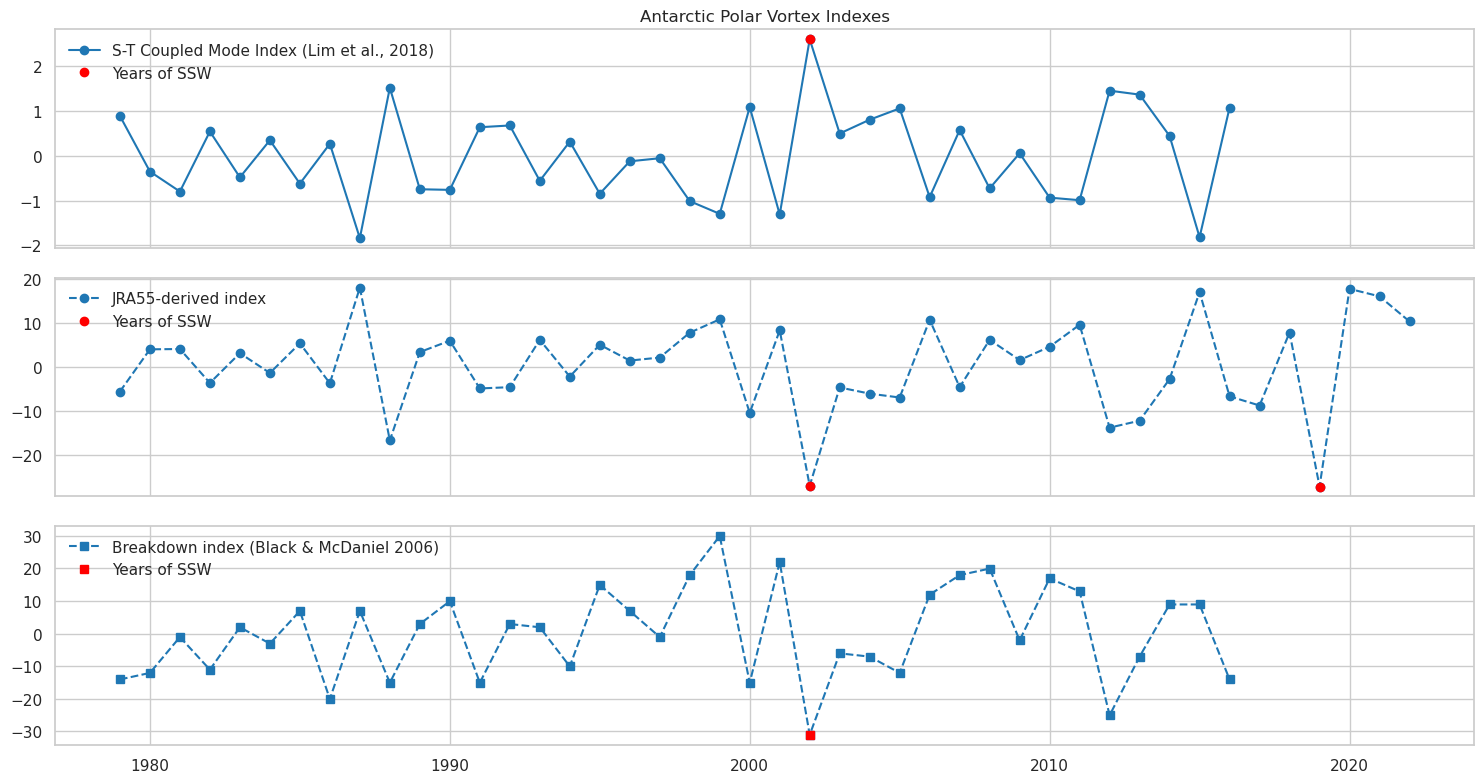

In [79]:
### Set style
sns.set(style='whitegrid')

# Create a figure with two subplots
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(15, 8), sharex=True)

# Define colors and line styles
line_color = 'tab:blue'
line_style_column2 = '-'
line_style_column3 = '--'

# Plot the first column (years) and second column (S-Tmode_Lim_et_al_2018)
ax1.plot(data['Year'], data['S-Tmode_Lim_et_al_2018'], marker='o', linestyle=line_style_column2, color=line_color, label='S-T Coupled Mode Index (Lim et al., 2018)')
#ax1.scatter(data[data['Year'].isin([2002, 2019])]['Year'], data[data['Year'].isin([2002, 2019])]['S-Tmode_Lim_et_al_2018'], marker='o', edgecolor='red', facecolor='red', s=60, label='Years of SSW')
ax1.plot(data[data['Year'].isin([2002, 2019])]['Year'], data[data['Year'].isin([2002, 2019])]['S-Tmode_Lim_et_al_2018'], marker='o', linestyle='None', color='red', markersize=6, label='Years of SSW')
ax1.set_ylabel('')
ax1.set_title('Antarctic Polar Vortex Indexes')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot the third column (replace 'Column_3' with the actual column name)
ax2.plot(data['Year'], data['Sep-Nov[U]_60S10hPa_JRA55'], marker='o', linestyle=line_style_column3, color=line_color, label='JRA55-derived index')
ax2.plot(data[data['Year'].isin([2002, 2019])]['Year'], data[data['Year'].isin([2002, 2019])]['Sep-Nov[U]_60S10hPa_JRA55'], marker='o', linestyle='None', color='red', markersize=6,label='Years of SSW')
ax2.set_ylabel('')
ax2.legend()
ax2.grid(True)

# Plot the third column (replace 'Column_3' with the actual column name)
ax3.plot(data2['Year'], data2['Index'], marker='s', linestyle=line_style_column3, color=line_color, label='Breakdown index (Black & McDaniel 2006)')
ax3.plot(data2[data2['Year'].isin([2002])]['Year'], data2[data2['Year'].isin([2002])]['Index'], marker='s', linestyle='None', color='red', markersize=6,label='Years of SSW')
ax3.set_ylabel('')
ax3.legend(loc="upper left")
ax3.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Specify the folder path
output_folder = '/home/jovyan/ohw23_proj_SAupwelling/Figures/'

# Save the figure to the specified folder
fig.savefig(os.path.join(output_folder, 'PV_index_timeseries.png'), dpi=300, bbox_inches='tight')

